In [1]:
import ultralytics
print(ultralytics.__file__)

# fine if it reports local path - Bone_Fracture_Detection\ultralytics\ultralytics\__init__.py

# there should be a right torch version - if somethimg happens we may need reinstallation

C:\Users\Admin\source\repos\Bone_Fracture_Detection\ultralytics\ultralytics\__init__.py


In [2]:
from ultralytics import YOLO
from ultralytics import settings
settings.update({"wandb": True})
import wandb

In [3]:
wandb.login()

wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from C:\Users\Admin\_netrc.
wandb: Currently logged in as: gristrkv (gristrkv-klagenfurt-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [4]:
sweep_config = {
    'method': 'grid'
    }

In [5]:
metric = {
    'name': 'loss',
    'goal': 'minimize'   
    }

sweep_config['metric'] = metric

In [6]:
parameters_dict = {
    'epochs': {
        'value': 50
        },
    'optimizer': {
        'value': 'sgd'
        },
    'lr0': {
        'value': 0.002
        },
    'batch': {
        'value': 16
        },
    }

'''
    parameters_dict = {
    'epochs': {
        'value': 50
        },
    'optimizer': {
        'values': ['sgd', 'adam']
        },
    'lr0': {
        'values': [0.001, 0.002]
        },
    'batch': {
        'values': [32, 16]
        },
    }
'''

sweep_config['parameters'] = parameters_dict

In [7]:
sweep_id = wandb.sweep(sweep_config, project="bone_fracture_detection")
#sweep_id = wandb.sweep('cfg/sweep_cfg.yaml', project="bone_fracture_detection")

Create sweep with ID: qu8odkgl
Sweep URL: https://wandb.ai/gristrkv-klagenfurt-university/bone_fracture_detection/sweeps/qu8odkgl


In [8]:
import os

PROJECT_ROOT = r"C:\Users\Admin\source\repos\Bone_Fracture_Detection"
os.chdir(PROJECT_ROOT)

print("CWD:", os.getcwd())

CWD: C:\Users\Admin\source\repos\Bone_Fracture_Detection


In [9]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

Augmentations:

In [10]:
import albumentations as A

medical_albu_transforms = [
    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5),
    A.CLAHE(clip_limit=2.0,tile_grid_size=(8, 8),p=0.3),
    A.GaussNoise(std_range=[0.05, 0.05], mean_range=[0, 0], per_channel=False, noise_scale_factor=0.9, p=0.3),
    A.Rotate(limit=5, p=0.3),
]

c:\Users\Admin\source\repos\Bone_Fracture_Detection\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
BASE_CFG = r"cfg\base_cfg.yaml"
MODEL = "yolo11n.pt"
DATA = r"data\data.yaml"

In [12]:
model = YOLO("yolo11n.pt")   # pretrained
model.train(epochs=1, device="cuda:0", batch=48, data=DATA, workers=0, augmentations=medical_albu_transforms, mosaic=0.0, mixup=0.0, cutmix=0.0)
trainer = model.trainer
loader = trainer.train_loader

batch = next(iter(loader))
imgs = batch["img"]
bboxes = batch["bboxes"]
classes = batch["cls"]

New https://pypi.org/project/ultralytics/8.4.5 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.237  Python-3.10.11 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, augmentations=[RandomBrightnessContrast(p=0.5, brightness_by_max=True, brightness_limit=(-0.1, 0.1), contrast_limit=(-0.1, 0.1), ensure_safe_range=False), CLAHE(p=0.3, clip_limit=(1.0, 2.0), tile_grid_size=(8, 8)), GaussNoise(p=0.3, mean_range=(0.0, 0.0), noise_scale_factor=0.9, per_channel=False, std_range=(0.05, 0.05)), Rotate(p=0.3, border_mode=0, crop_border=False, fill=0.0, fill_mask=0.0, interpolation=1, limit=(-5.0, 5.0), mask_interpolation=0, rotate_method='largest_box')], auto_augment=randaugment, batch=48, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data\data.yaml, degrees=0.0, deterministic=

Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

KeyboardInterrupt: 

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import cv2
def show_batch_16(imgs, bboxes=None, classes=None):
    imgs = imgs.cpu()
    n_show = min(16, imgs.shape[0])
    
    plt.figure(figsize=(16,16))  # шире для 4 колонок
    
    for i in range(n_show):
        img = imgs[i].permute(1,2,0).numpy()  # (H,W,C)
        if img.max() > 1.0:
            img = img / 255.0
        
        img = img[..., ::-1]  # BGR -> RGB
        
        # Рисуем bbox, если переданы
        if bboxes is not None and classes is not None:
            b = bboxes[i]
            c = classes[i]
            b_list = b.tolist() if b.numel() > 0 else []
            c_list = c.tolist() if c.numel() > 0 else []
            import cv2
            for box, cls_ in zip(b_list, c_list):
                x, y, w, h = box
                H,W,_ = img.shape
                x1 = int((x-w/2)*W)
                y1 = int((y-h/2)*H)
                x2 = int((x+w/2)*W)
                y2 = int((y+h/2)*H)
                cv2.rectangle(img, (x1,y1), (x2,y2), (0,1,0), 2)
                cv2.putText(img, str(int(cls_)), (x1,y1-5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,1,0), 1)
        
        plt.subplot(4, 4, i+1)
        plt.imshow(img)
        plt.axis("off")
    
    plt.tight_layout()
    plt.show(block=True)

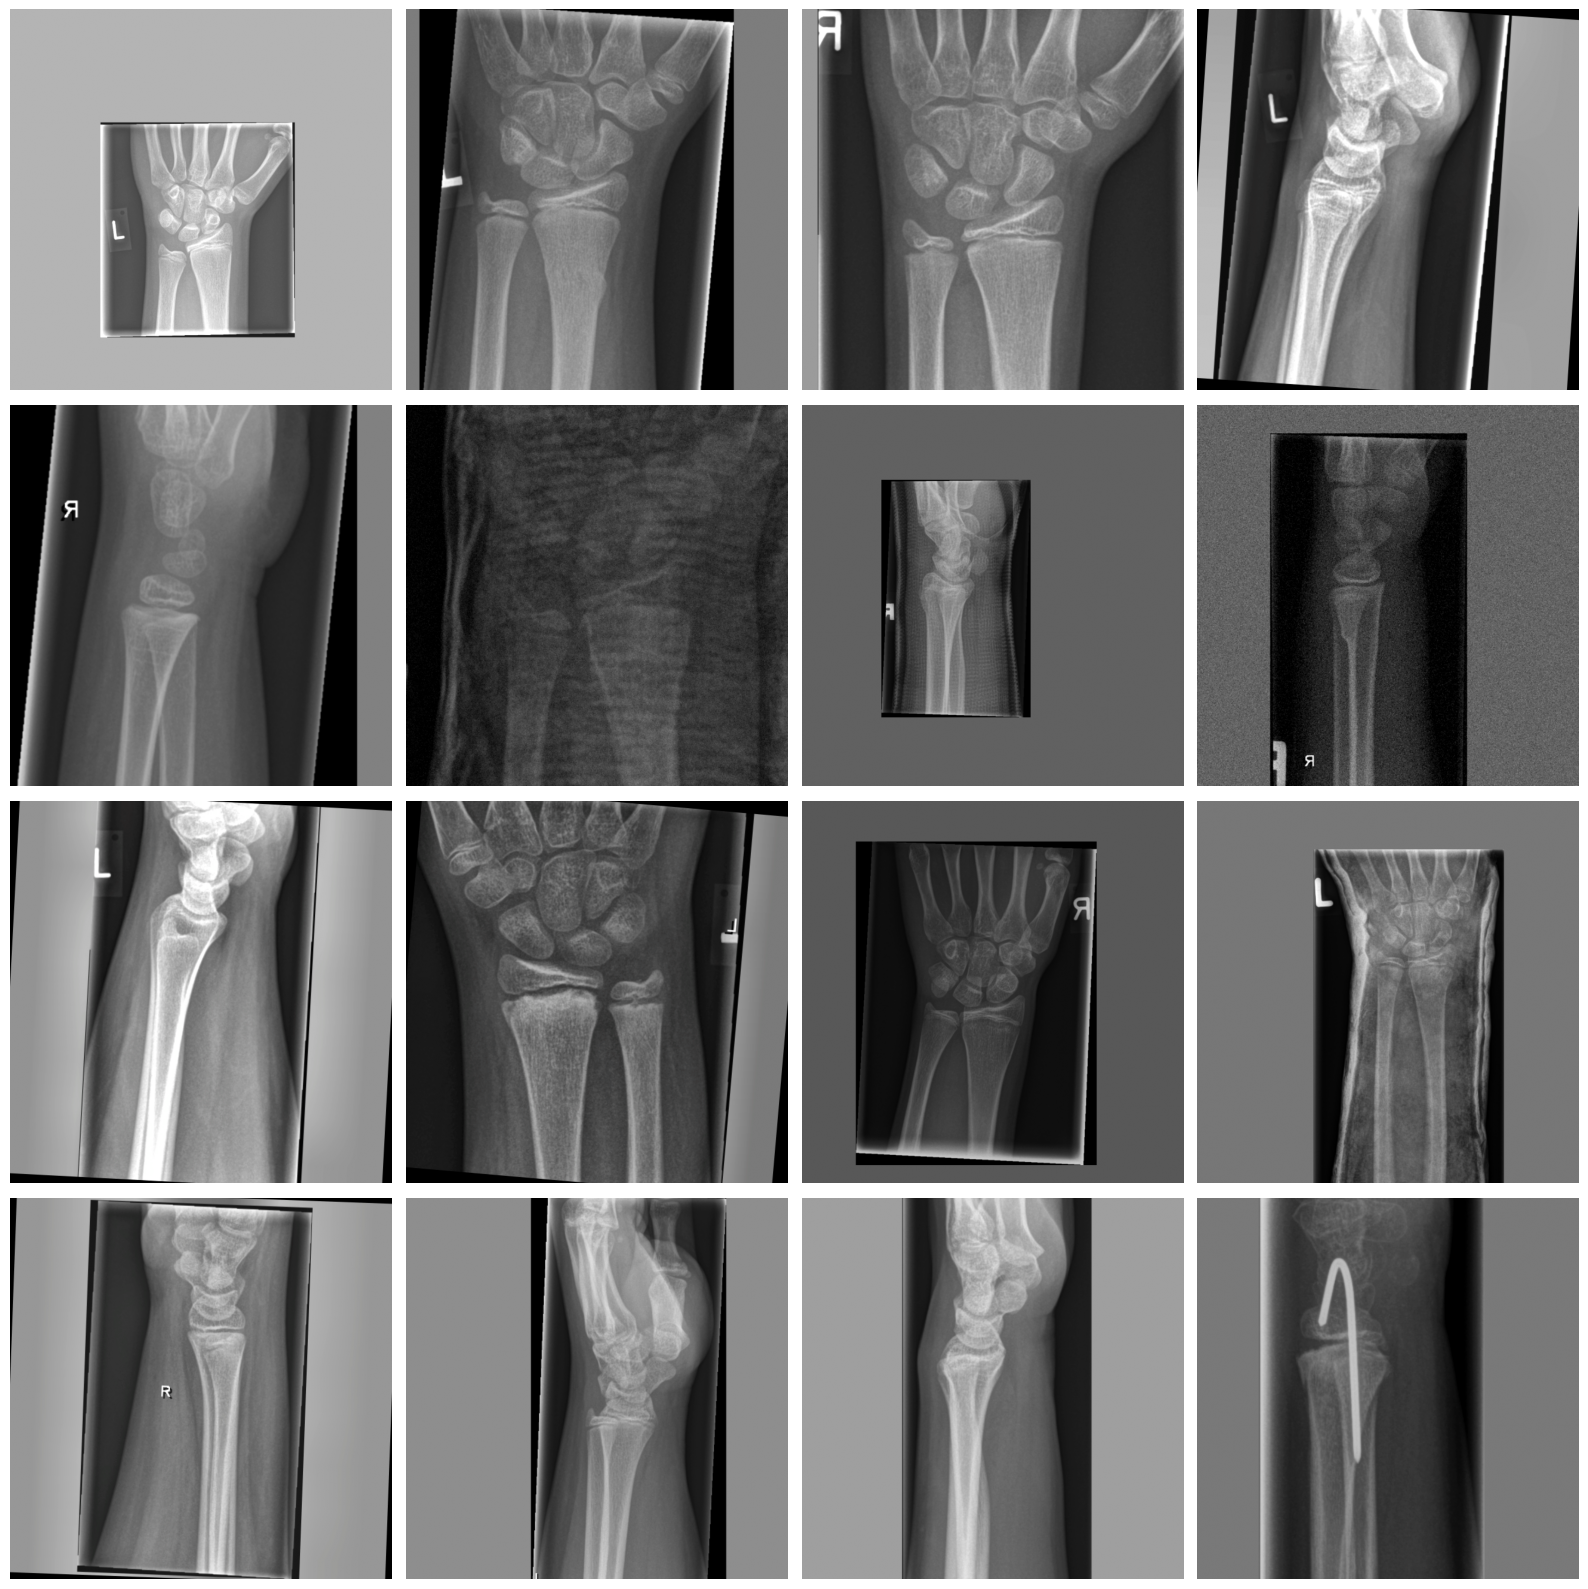

In [ ]:
show_batch_16(imgs)

In [12]:
import os
import sys

sys.path.insert(0, r"C:\Users\Admin\source\repos\Bone_Fracture_Detection")
from bfd_yolo import BFD_YOLO 

In [ ]:
#callbacks
from ultralytics.utils.metrics import box_iou
def on_val_end(validator):
    if validator.confusion_matrix is None:
        return

    cm = validator.confusion_matrix.matrix
    names_dict = validator.names
    nc = len(names_dict)
    class_names = [names_dict[i] for i in range(nc)]
    # remove background row/col
    cm = cm[:nc, :nc]

    # expand confusion matrix into y_true / preds
    y_true = []
    y_pred = []

    for true_cls in range(nc):
        for pred_cls in range(nc):
            count = int(cm[true_cls, pred_cls])
            y_true.extend([true_cls] * count)
            y_pred.extend([pred_cls] * count)

    if len(y_true) == 0:
        return

    wandb.log({
        "conf_mat": wandb.plot.confusion_matrix(
            probs=None,
            y_true=y_true,
            preds=y_pred,
            class_names=names
        )
    })

def on_val_batch_end(validator):
    preds = validator.pred
    batch = trainer.batch

    for i, det in enumerate(preds):
        if det is None or len(det) == 0:
            continue

        gt_mask = batch["batch_idx"] == i
        gt_boxes = batch["bboxes"][gt_mask]
        gt_boxes = xywh2xyxy(gt_boxes)

        pred_boxes = det[:, :4]

        iou = box_iou(pred_boxes, gt_boxes)  # (Np, Ng)
        max_iou = iou.max(dim=1).values

        trainer.my_iou_sum += max_iou.mean().item()

In [17]:
from datetime import datetime
import torch, gc


def train():
    wandb.init(name=f"yolo11n_b32_sgd_lr0.02_bfd")
    overrides = dict(wandb.config)
    overrides["cfg"] = BASE_CFG
    overrides["model"] = MODEL
    overrides["data"] = DATA

    model = BFD_YOLO("yolo11n.pt")   # pretrained
    #model.add_callback("on_val_end", on_val_end)
    #model.add_callback("on_val_batch_end", on_val_batch_end)
    model.train(device="cuda:0", workers=0, augmentations=medical_albu_transforms, **overrides, val=True)
    wandb.finish()
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    save_path = f"yolo11n_b32_sgd_lr0.02_bfd_{timestamp}.pt"
    model.save(save_path)

    del model
    gc.collect()
    torch.cuda.empty_cache()
    

In [15]:
wandb.agent(sweep_id, train)

wandb: Agent Starting Run: tkx6z3nq with config:
wandb: 	batch: 16
wandb: 	epochs: 50
wandb: 	lr0: 0.002
wandb: 	optimizer: sgd
wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from C:\Users\Admin\_netrc.


New https://pypi.org/project/ultralytics/8.4.6 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.237  Python-3.10.11 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, augmentations=[RandomBrightnessContrast(p=0.5, brightness_by_max=True, brightness_limit=(-0.1, 0.1), contrast_limit=(-0.1, 0.1), ensure_safe_range=False), CLAHE(p=0.3, clip_limit=(1.0, 2.0), tile_grid_size=(8, 8)), GaussNoise(p=0.3, mean_range=(0.0, 0.0), noise_scale_factor=0.9, per_channel=False, std_range=(0.05, 0.05)), Rotate(p=0.3, border_mode=0, crop_border=False, fill=0.0, fill_mask=0.0, interpolation=1, limit=(-5.0, 5.0), mask_interpolation=0, rotate_method='largest_box')], auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=cfg\base_cfg.yaml, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data\data.yaml, degrees=0.0, d

wandb: WARNING Tried to log to step 50 that is less than the current step 51. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: ERROR The nbformat package was not found. It is required to save notebook history.


lr/pg0,█▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg1,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,▃▆██▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▂▃▄▅▅▆▆▆▆▆▇▆▇▇▇▇▇██████████████████████
metrics/mAP50-95(B),▁▂▃▃▄▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇███████████████████
metrics/precision(B),▃█▅▄▄▂▂▃▃▃▃▃▁▃▄▃▁▃▄▃▃▃▄▃▄▃▄▄▄▄▃▃▄▄▄▄▄▄▄▄
metrics/recall(B),▁▂▂▄▅▆▆▅▆▆▅▆▆▇▆▆▇▇▇████▇██▇▇██████▇▇▇███
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [15]:
from bfd_yolo import BFD_YOLO 
model = BFD_YOLO("yolo11n_20260118_115656.pt")
model.val()

Ultralytics 8.3.237  Python-3.10.11 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 2631.536.2 MB/s, size: 826.2 KB)
val: Scanning C:\Users\Admin\source\repos\Bone_Fracture_Detection\data\labels\val.cache... 2033 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2033/2033 2.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 128/128 14.3it/s 8.9s0.1s
                   all       2033       4865      0.725      0.504      0.505      0.323
           boneanomaly         19         34      0.312     0.0882      0.142     0.0637
            bonelesion          5          5          1          0          0          0
           foreignbody          4          4          1          0          0          0
              fracture       1402       1887      0.851      0.876      0.9

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001D2838022C0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.